# Transformation and Preparation of Datasets

## Importing Data and Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load full datasets
bottle_data = pd.read_csv('Datasets/194903-202105_Bottle.csv', encoding='latin1')
cast_data = pd.read_csv('Datasets/194903-202105_Cast.csv', encoding='latin1')

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_7378/374561893.py:6: DtypeWarning: Columns (47,61) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle_data = pd.read_csv('Datasets/194903-202105_Bottle.csv', encoding='latin1')
/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_7378/374561893.py:7: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast_data = pd.read_csv('Datasets/194903-202105_Cast.csv', encoding='latin1')


## Data Joint and Unification

In [24]:
# Select relevant columns from each dataset
bottle_columns = ['Cst_Cnt', 'Sta_ID', 'ChlorA', 'Phaeop', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Depthm']
cast_columns = ['Cst_Cnt', 'Sta_ID', 'Date', 'Year', 'Month', 'Julian_Day', 'Julian_Date', 'Lat_Dec', 'Lon_Dec', 'Wind_Spd', 'Wave_Ht', 'Dry_T', 'Wave_Prd', 'Barometer']

# Filter and group the relevant columns
bottle_data_filtered = bottle_data[bottle_columns].groupby(['Cst_Cnt', 'Sta_ID']).mean().reset_index()
cast_data_filtered = cast_data[cast_columns].groupby(['Cst_Cnt', 'Sta_ID', 'Date', 'Year', 'Month', 'Julian_Day', 'Lat_Dec', 'Lon_Dec']).mean().reset_index()

# Merge the datasets using 'Cst_Cnt' and 'Sta_ID' as identifiers
combined_data = pd.merge(bottle_data_filtered, cast_data_filtered, on=['Cst_Cnt', 'Sta_ID'], how='inner')

# Convert 'Date' to datetime format if it's not already
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Display the combined dataset
combined_data.tail()

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
35639,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.84630,-119.56590,44321.0,3.0,2.0,14.2,8.0,1015.8
35640,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.51513,-120.24052,44322.0,7.0,NaN,13.6,NaN,1015.4
35641,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.17682,-120.92090,44322.0,6.0,NaN,12.7,NaN,1016.9
35642,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.84638,-121.58903,44322.0,7.0,3.0,13.1,8.0,1017.6
35643,35644,093.3 100.0,0.205000,0.100643,11.025136,25.713335,3.615905,1.558095,27.098095,18.823333,...,5,126,30.51350,-122.25867,44322.0,6.0,2.0,13.0,5.0,1017.8


In [25]:
# Calculate the percentage of NaN values per column, formatted to 2 decimals and in percentage format
na_percentage = (combined_data.isna().mean() * 100).round(2)

# Display the results in percentage format
na_percentage = na_percentage.apply(lambda x: f"{x:.2f}%")

# Print the results
print('Missing Values per Column (in %)')
print(na_percentage)

Missing Values per Column (in %)
Cst_Cnt         0.00%
Sta_ID          0.00%
ChlorA         60.91%
Phaeop         60.91%
T_degC          0.72%
Salnty          2.18%
O2ml_L         23.05%
PO4uM          51.58%
SiO3uM         57.41%
NO3uM          59.93%
Depthm          0.00%
Date            0.00%
Year            0.00%
Month           0.00%
Julian_Day      0.00%
Lat_Dec         0.00%
Lon_Dec         0.00%
Julian_Date     0.00%
Wind_Spd        4.71%
Wave_Ht        64.26%
Dry_T          43.02%
Wave_Prd       65.58%
Barometer      43.04%
dtype: object


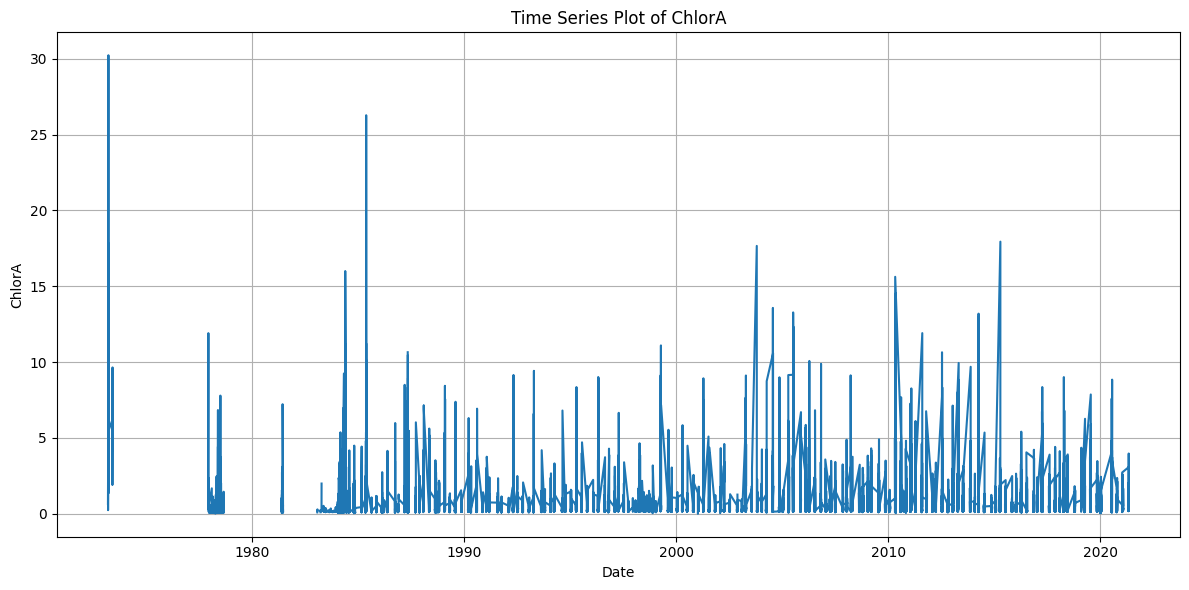

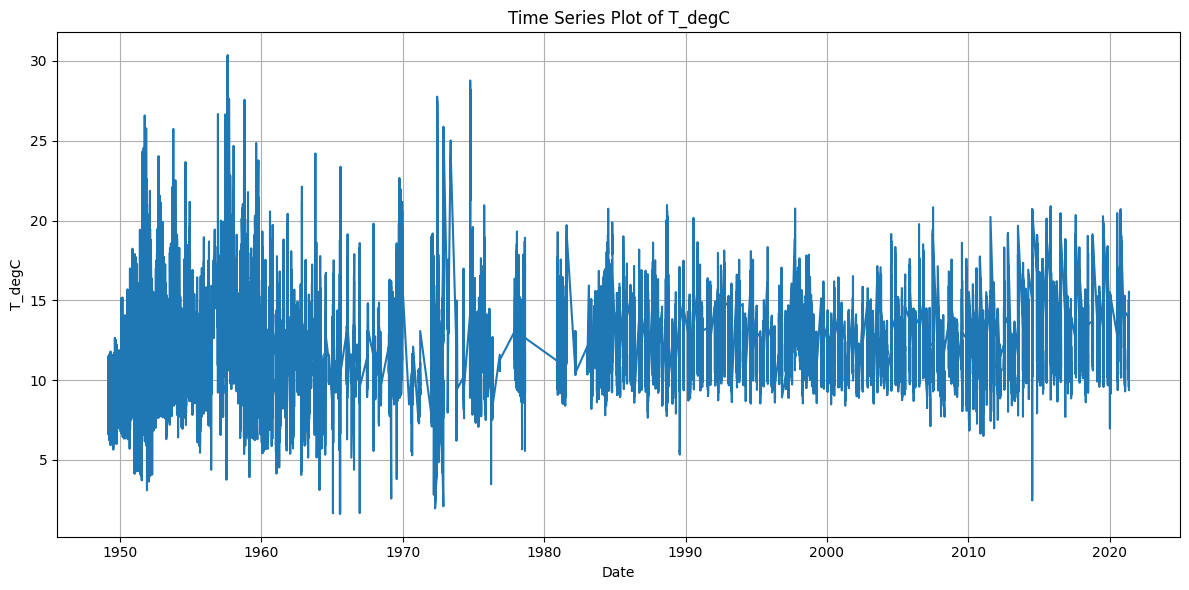

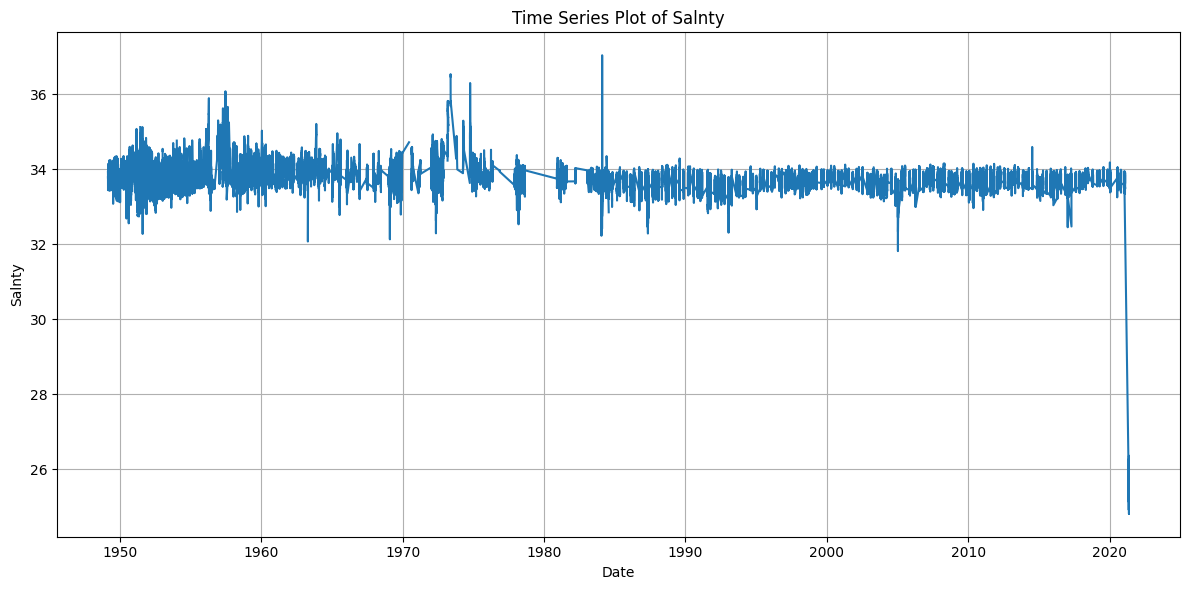

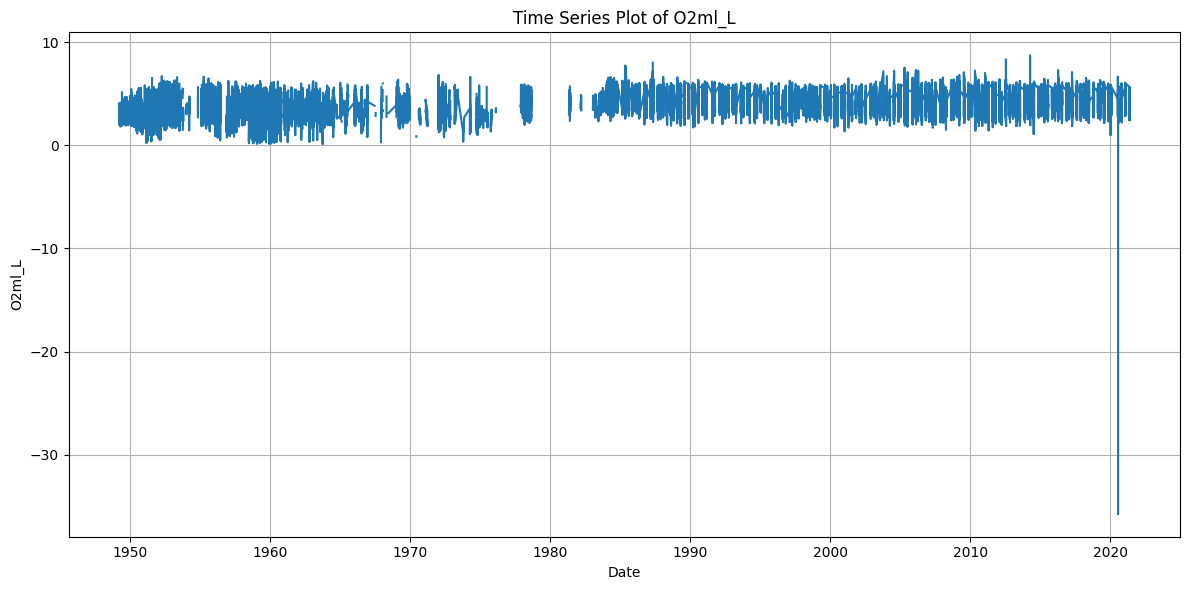

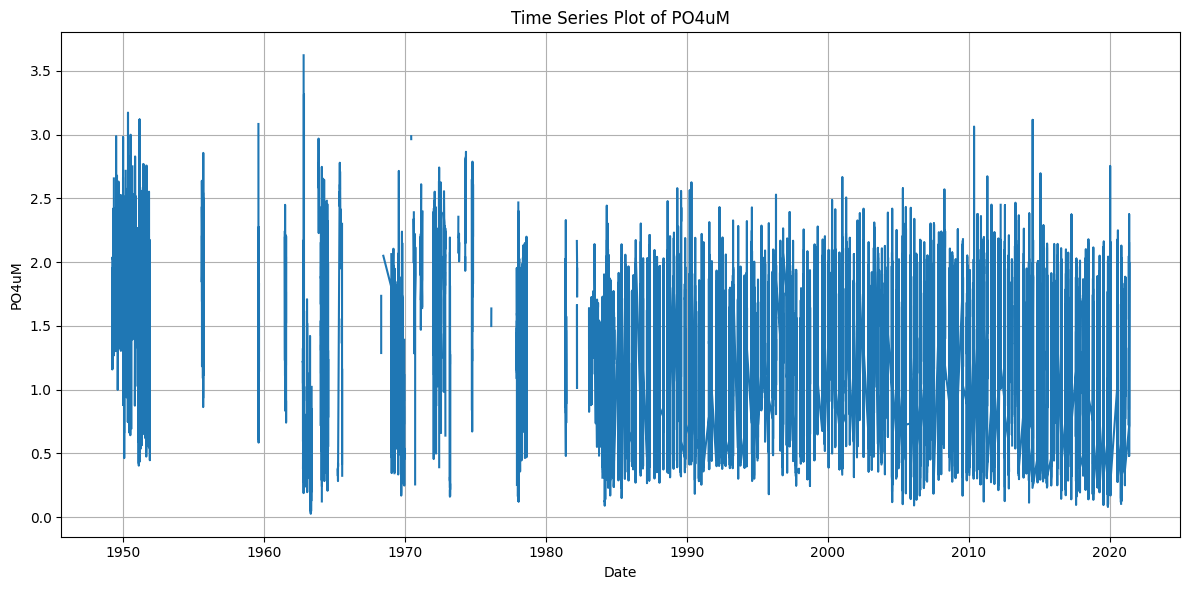

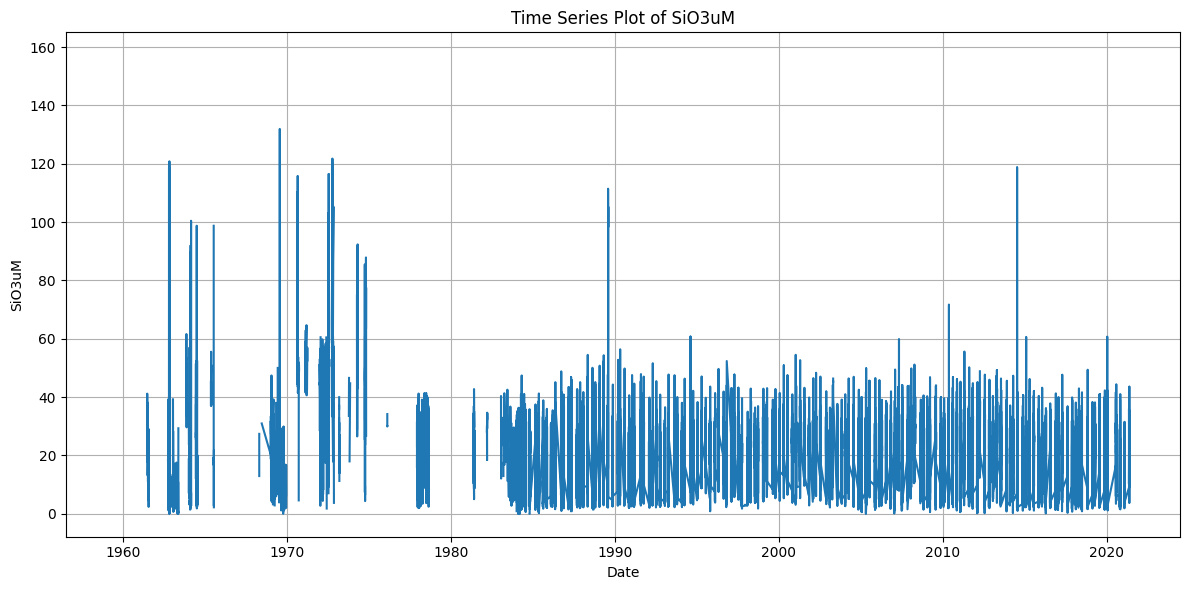

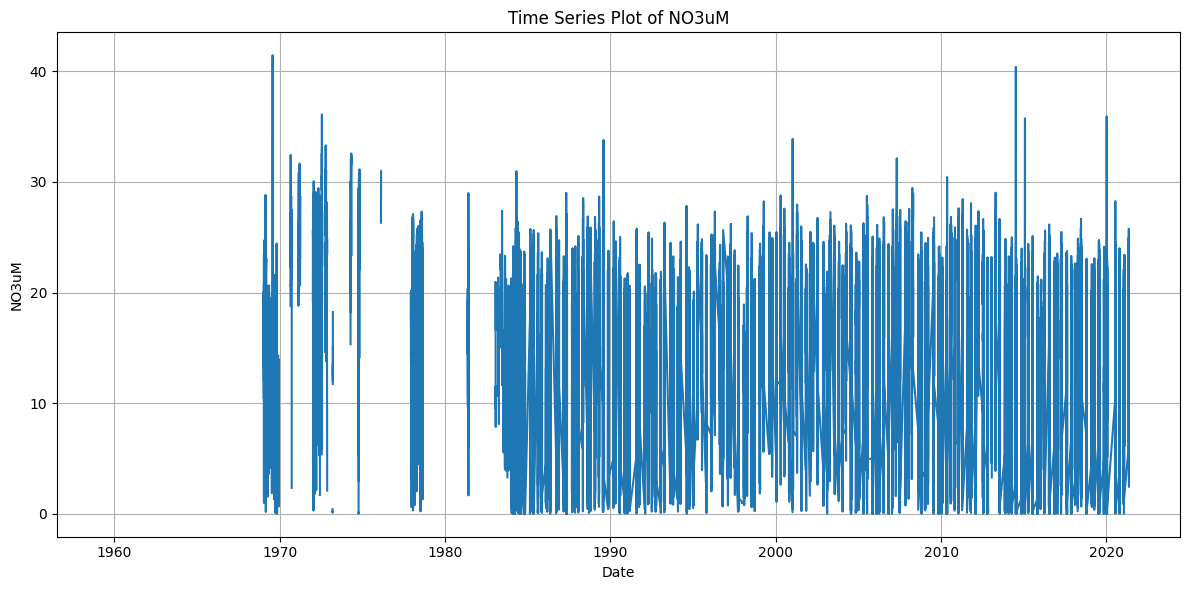

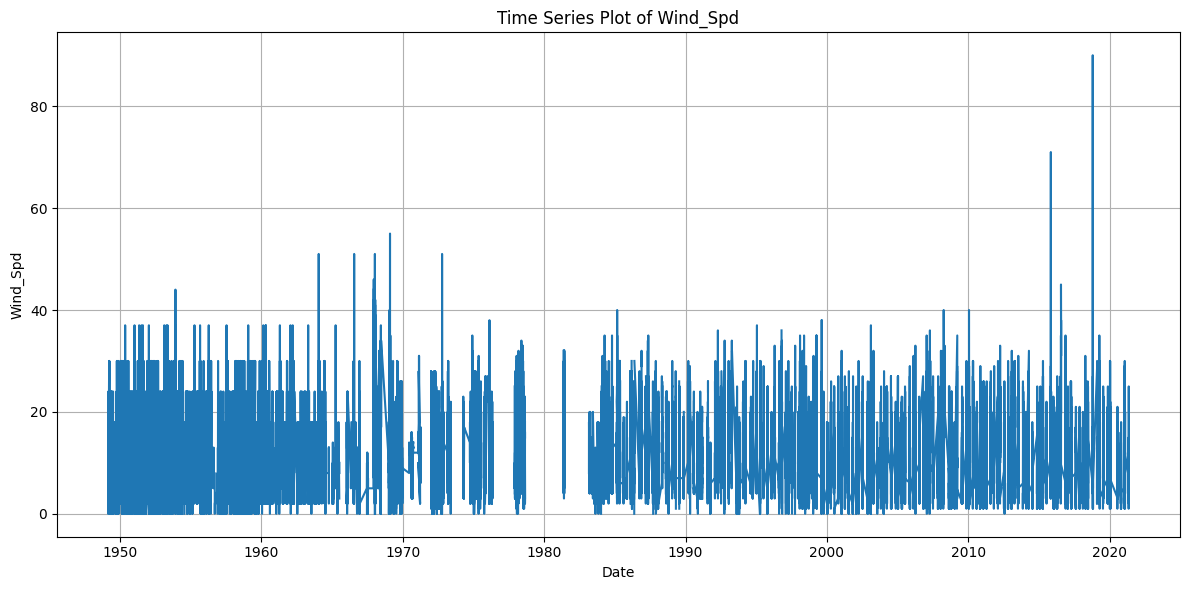

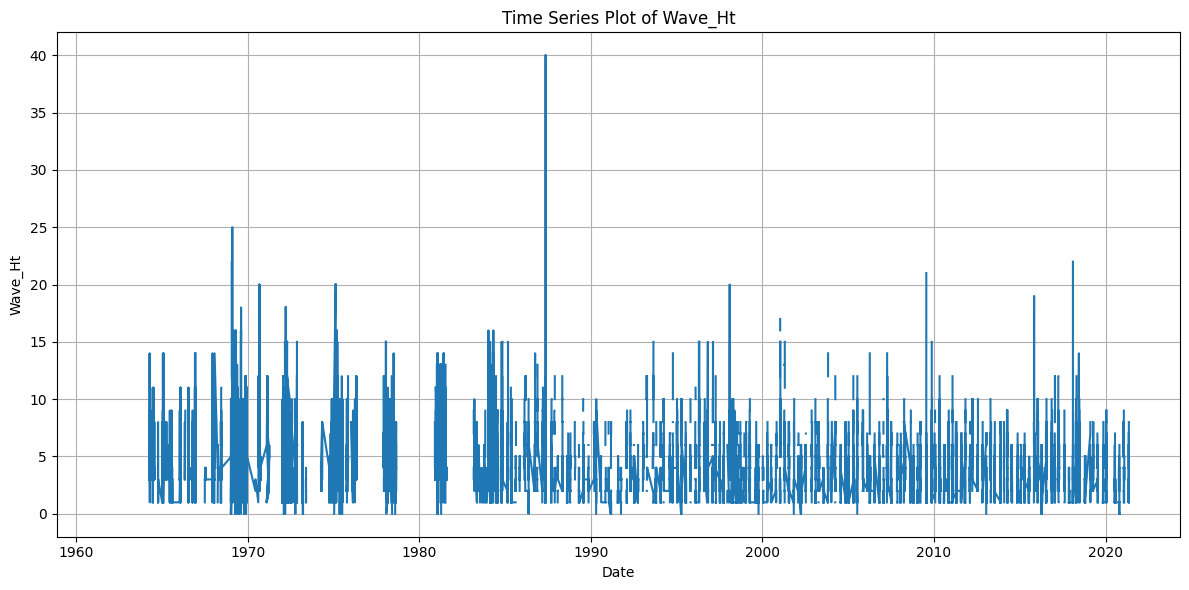

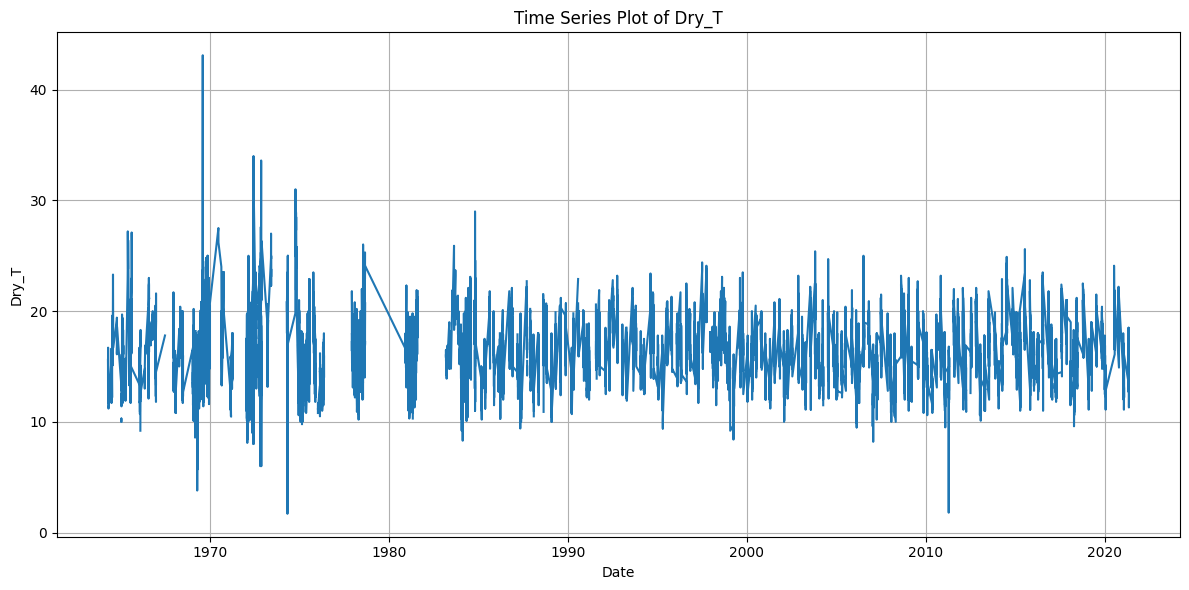

In [26]:
# List of key variables to plot over time
key_variables = ['ChlorA', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Wind_Spd', 'Wave_Ht', 'Dry_T']

# Create time series line plots for each key variable
for var in key_variables:
    if var in combined_data.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(combined_data['Date'], combined_data[var], marker='', linestyle='-', linewidth=1.5)
        plt.title(f'Time Series Plot of {var}')
        plt.xlabel('Date')
        plt.ylabel(var)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

- Missing Values are concentrated on older years
- Inconsistent Range of Missing Values  
- Few outliers in most variables
- Mostly Consistent Variance through Time

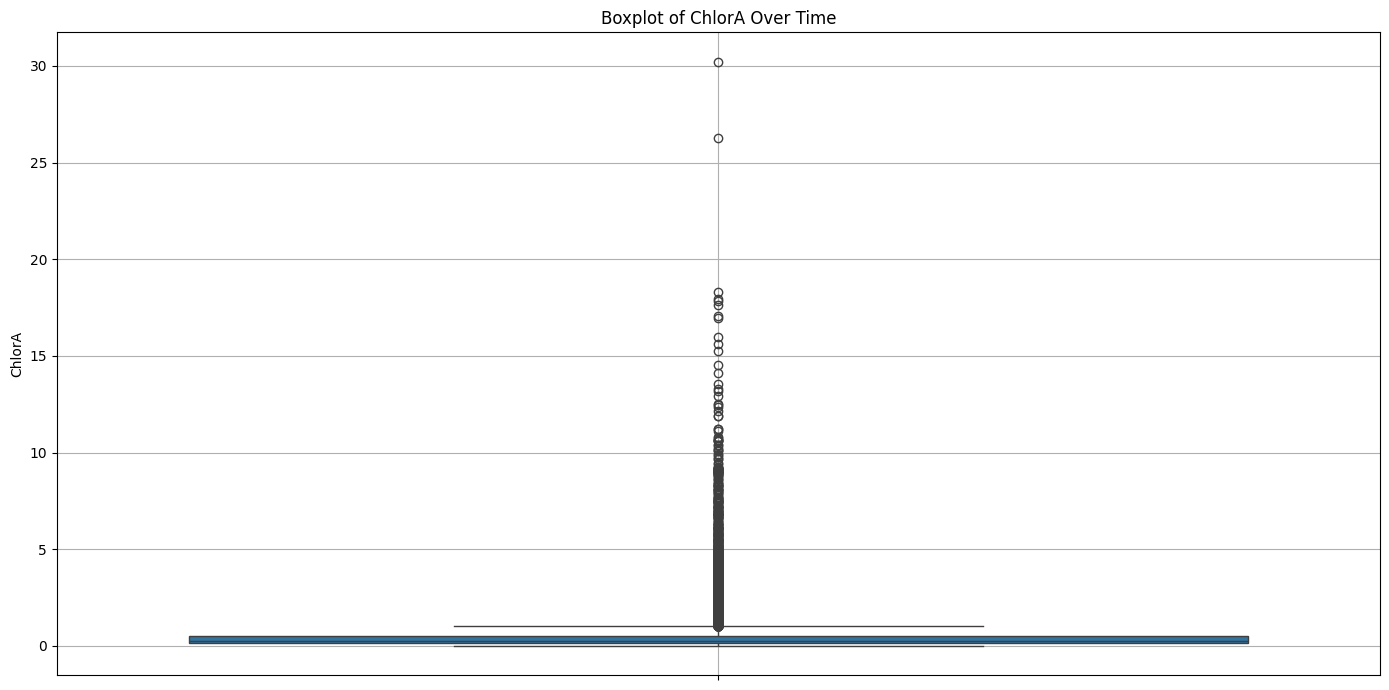

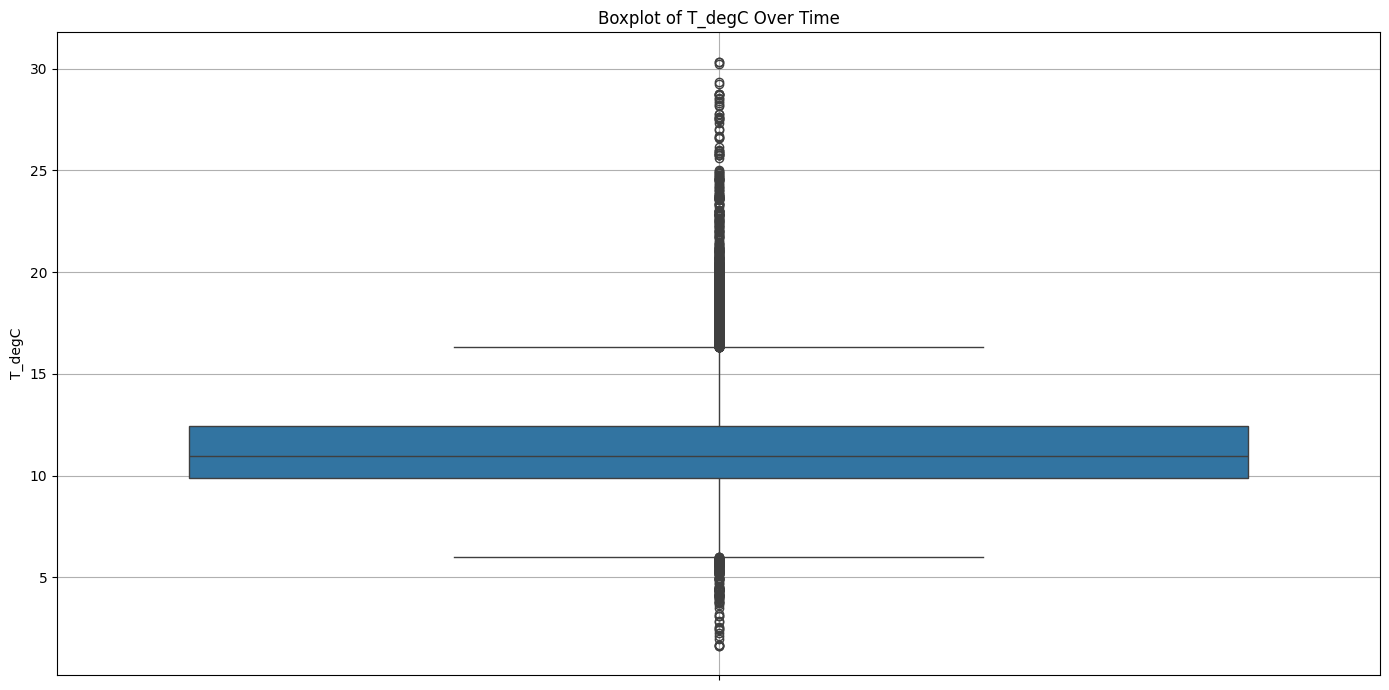

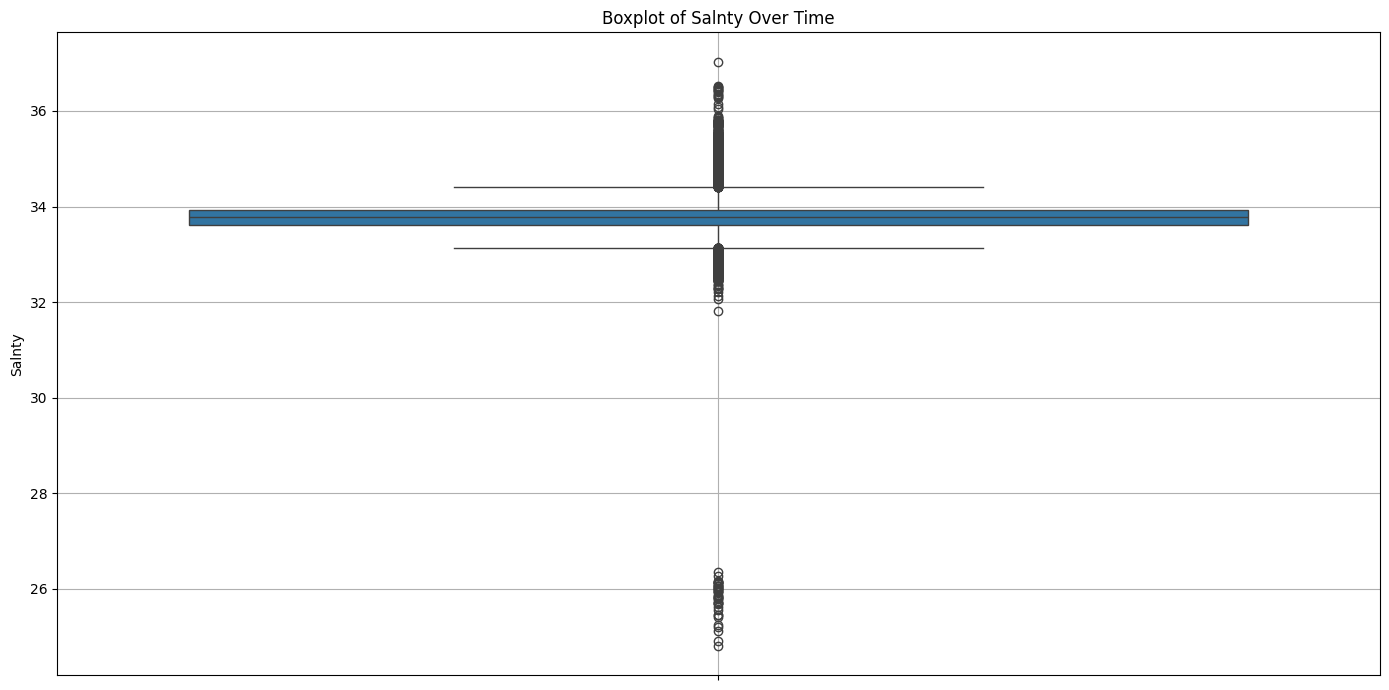

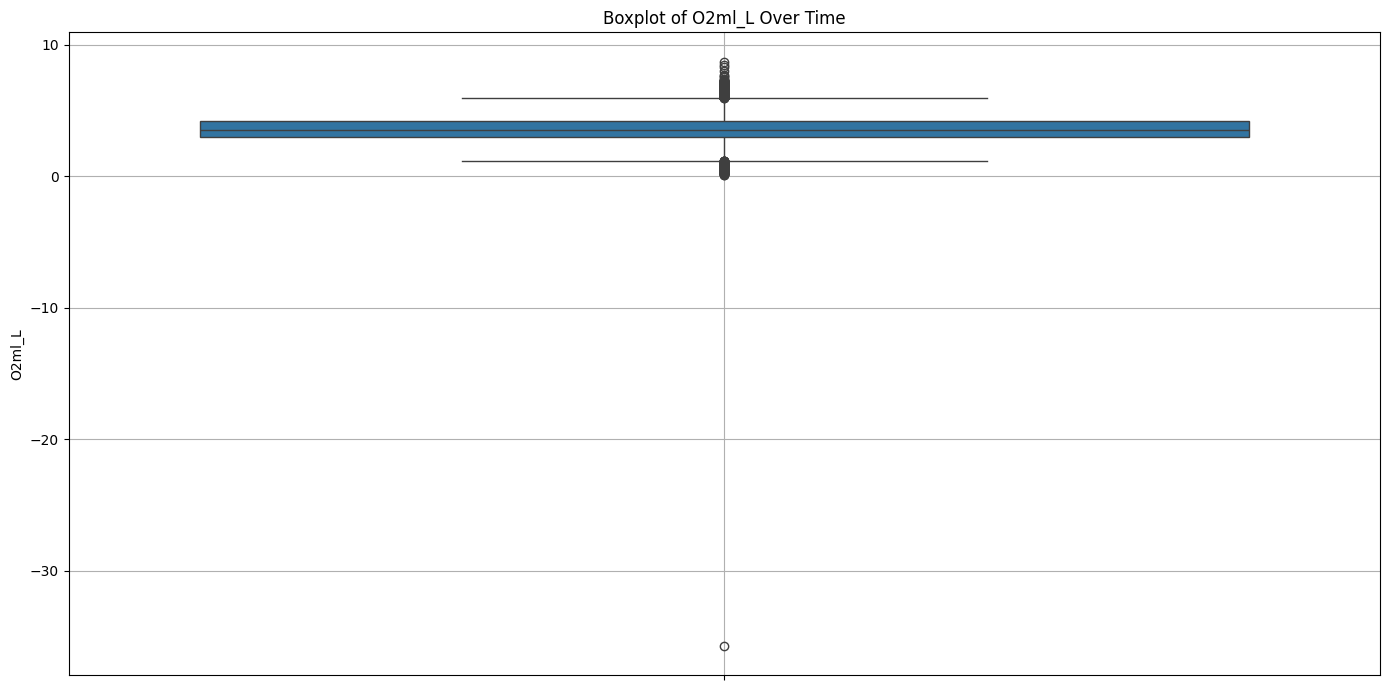

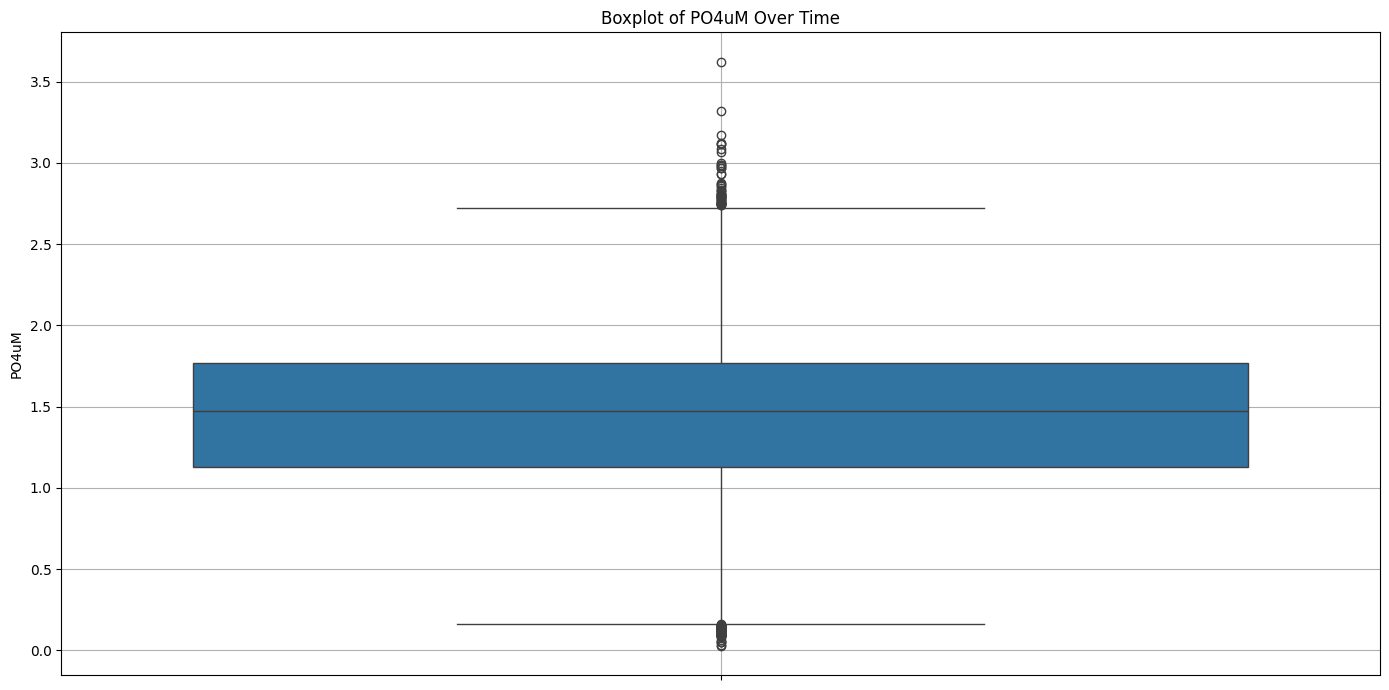

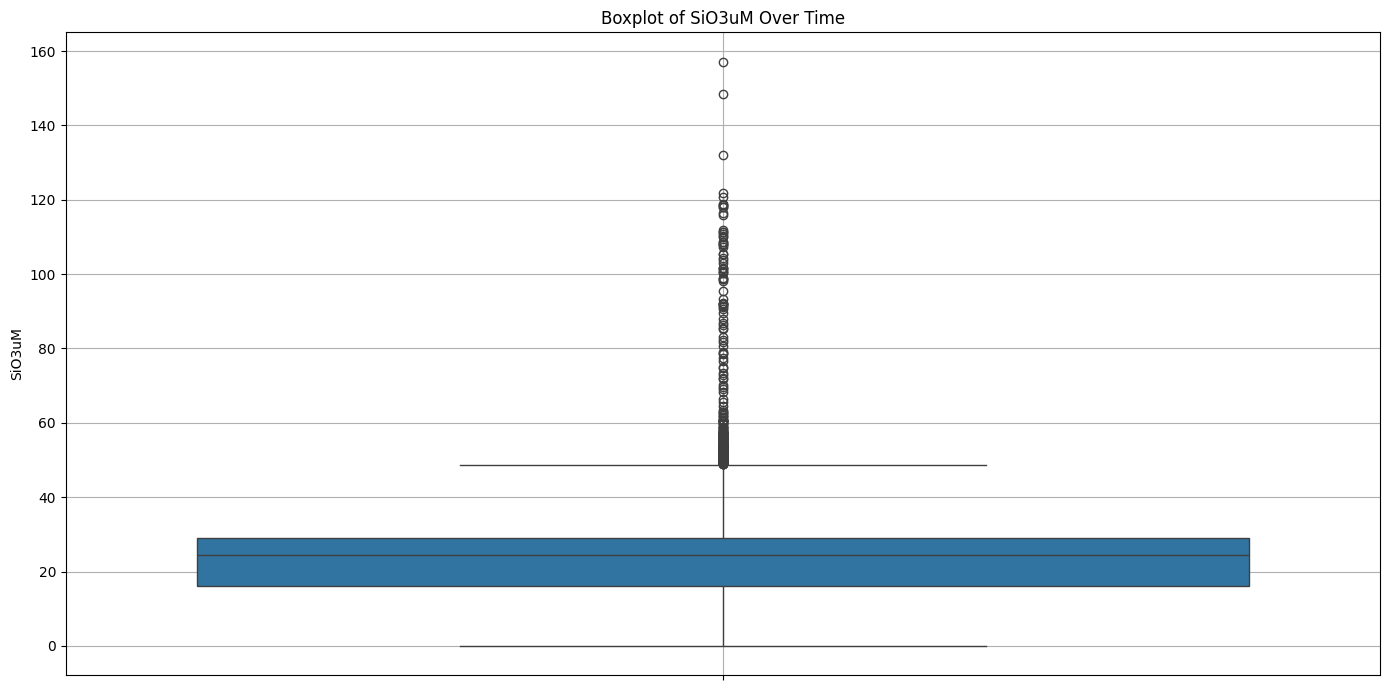

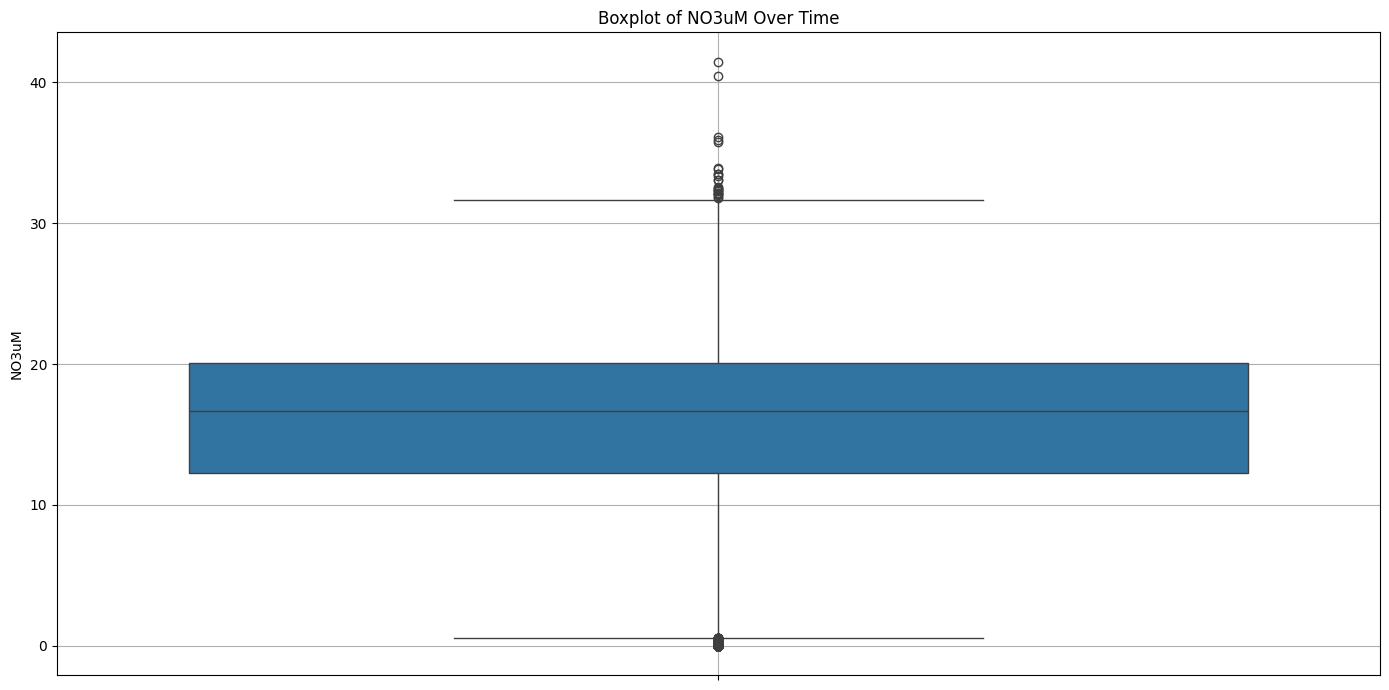

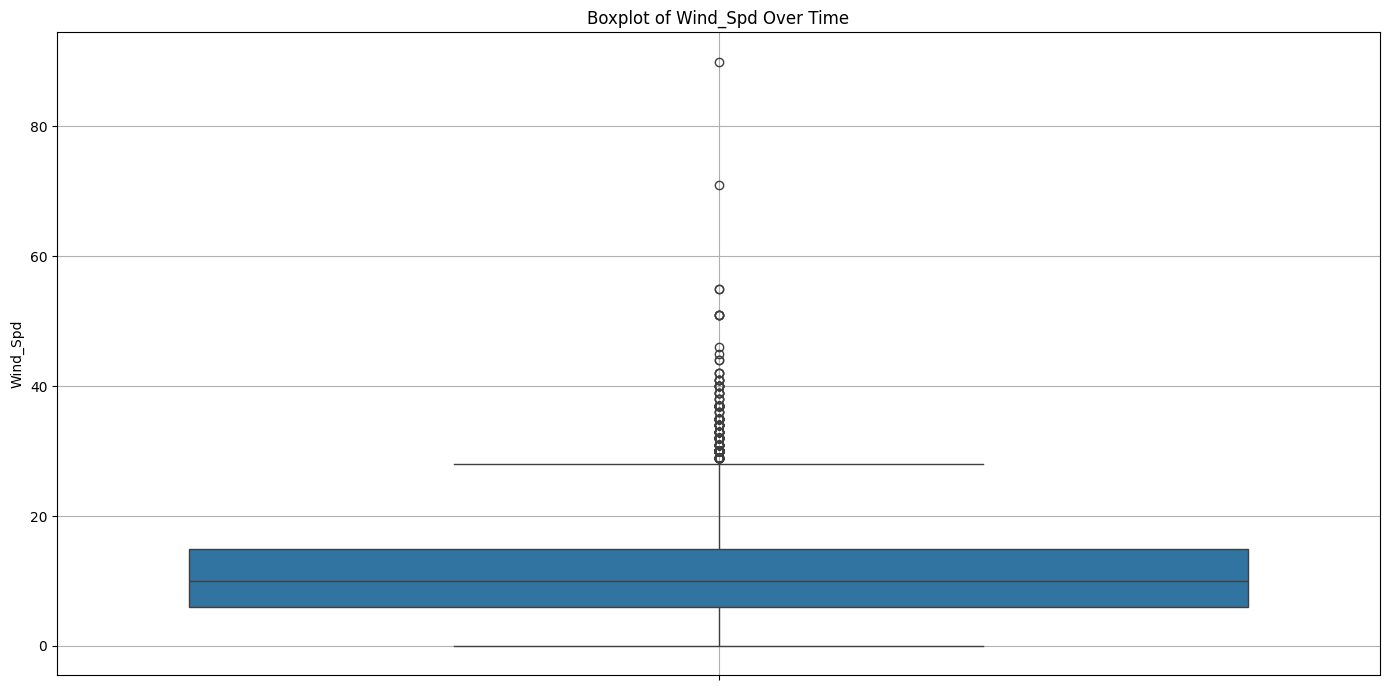

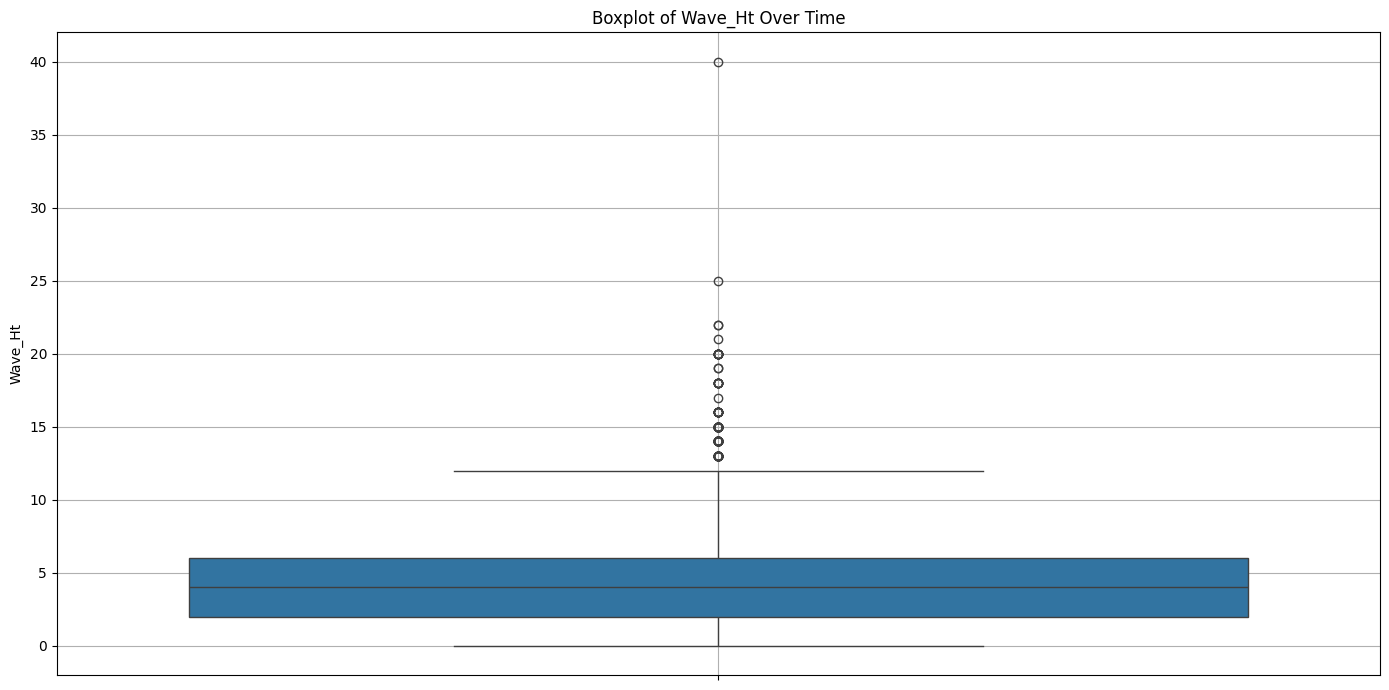

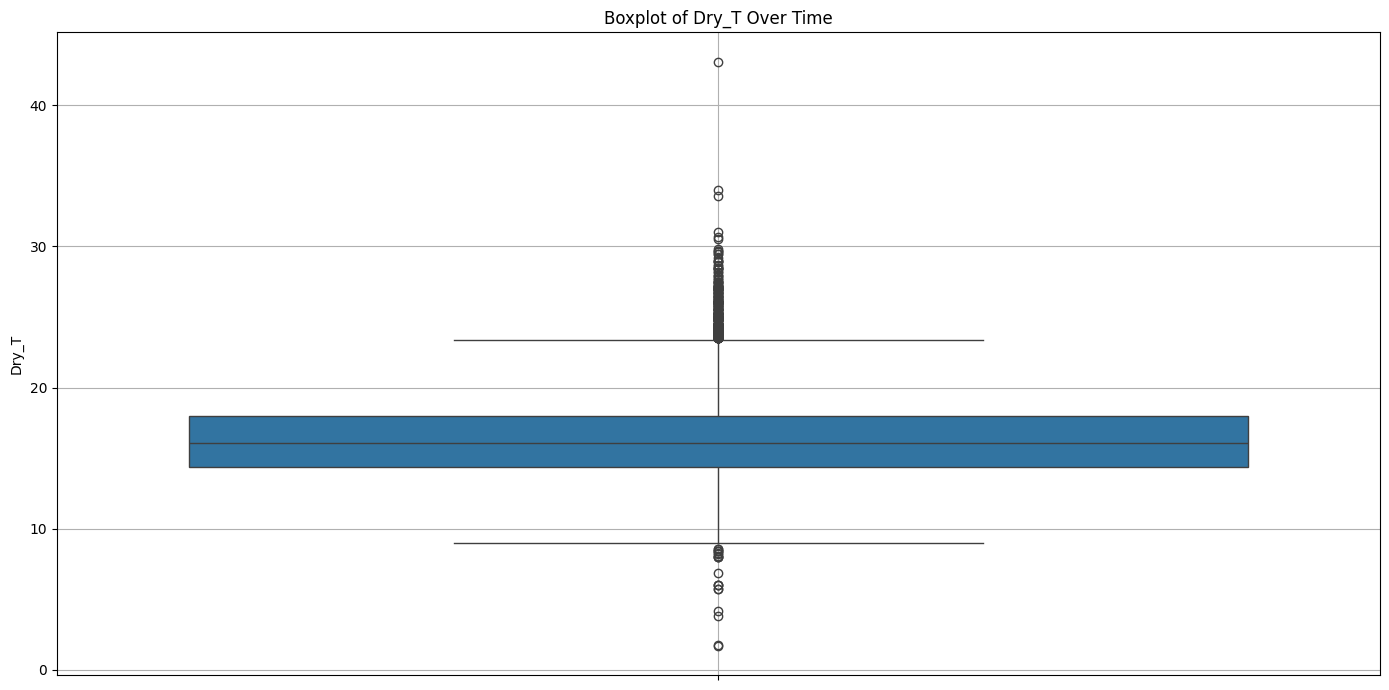

In [27]:
# Extract the year-month for aggregation if needed
combined_data['YearMonth'] = combined_data['Date'].dt.to_period('M')

# List of key variables to plot boxplots for
key_variables = ['ChlorA', 'T_degC', 'Salnty', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Wind_Spd', 'Wave_Ht', 'Dry_T']

# Create boxplots for each key variable
for var in key_variables:
    if var in combined_data.columns:
        plt.figure(figsize=(14, 7))
        sns.boxplot(y=var, data=combined_data)
        plt.title(f'Boxplot of {var} Over Time')
        plt.ylabel(var)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

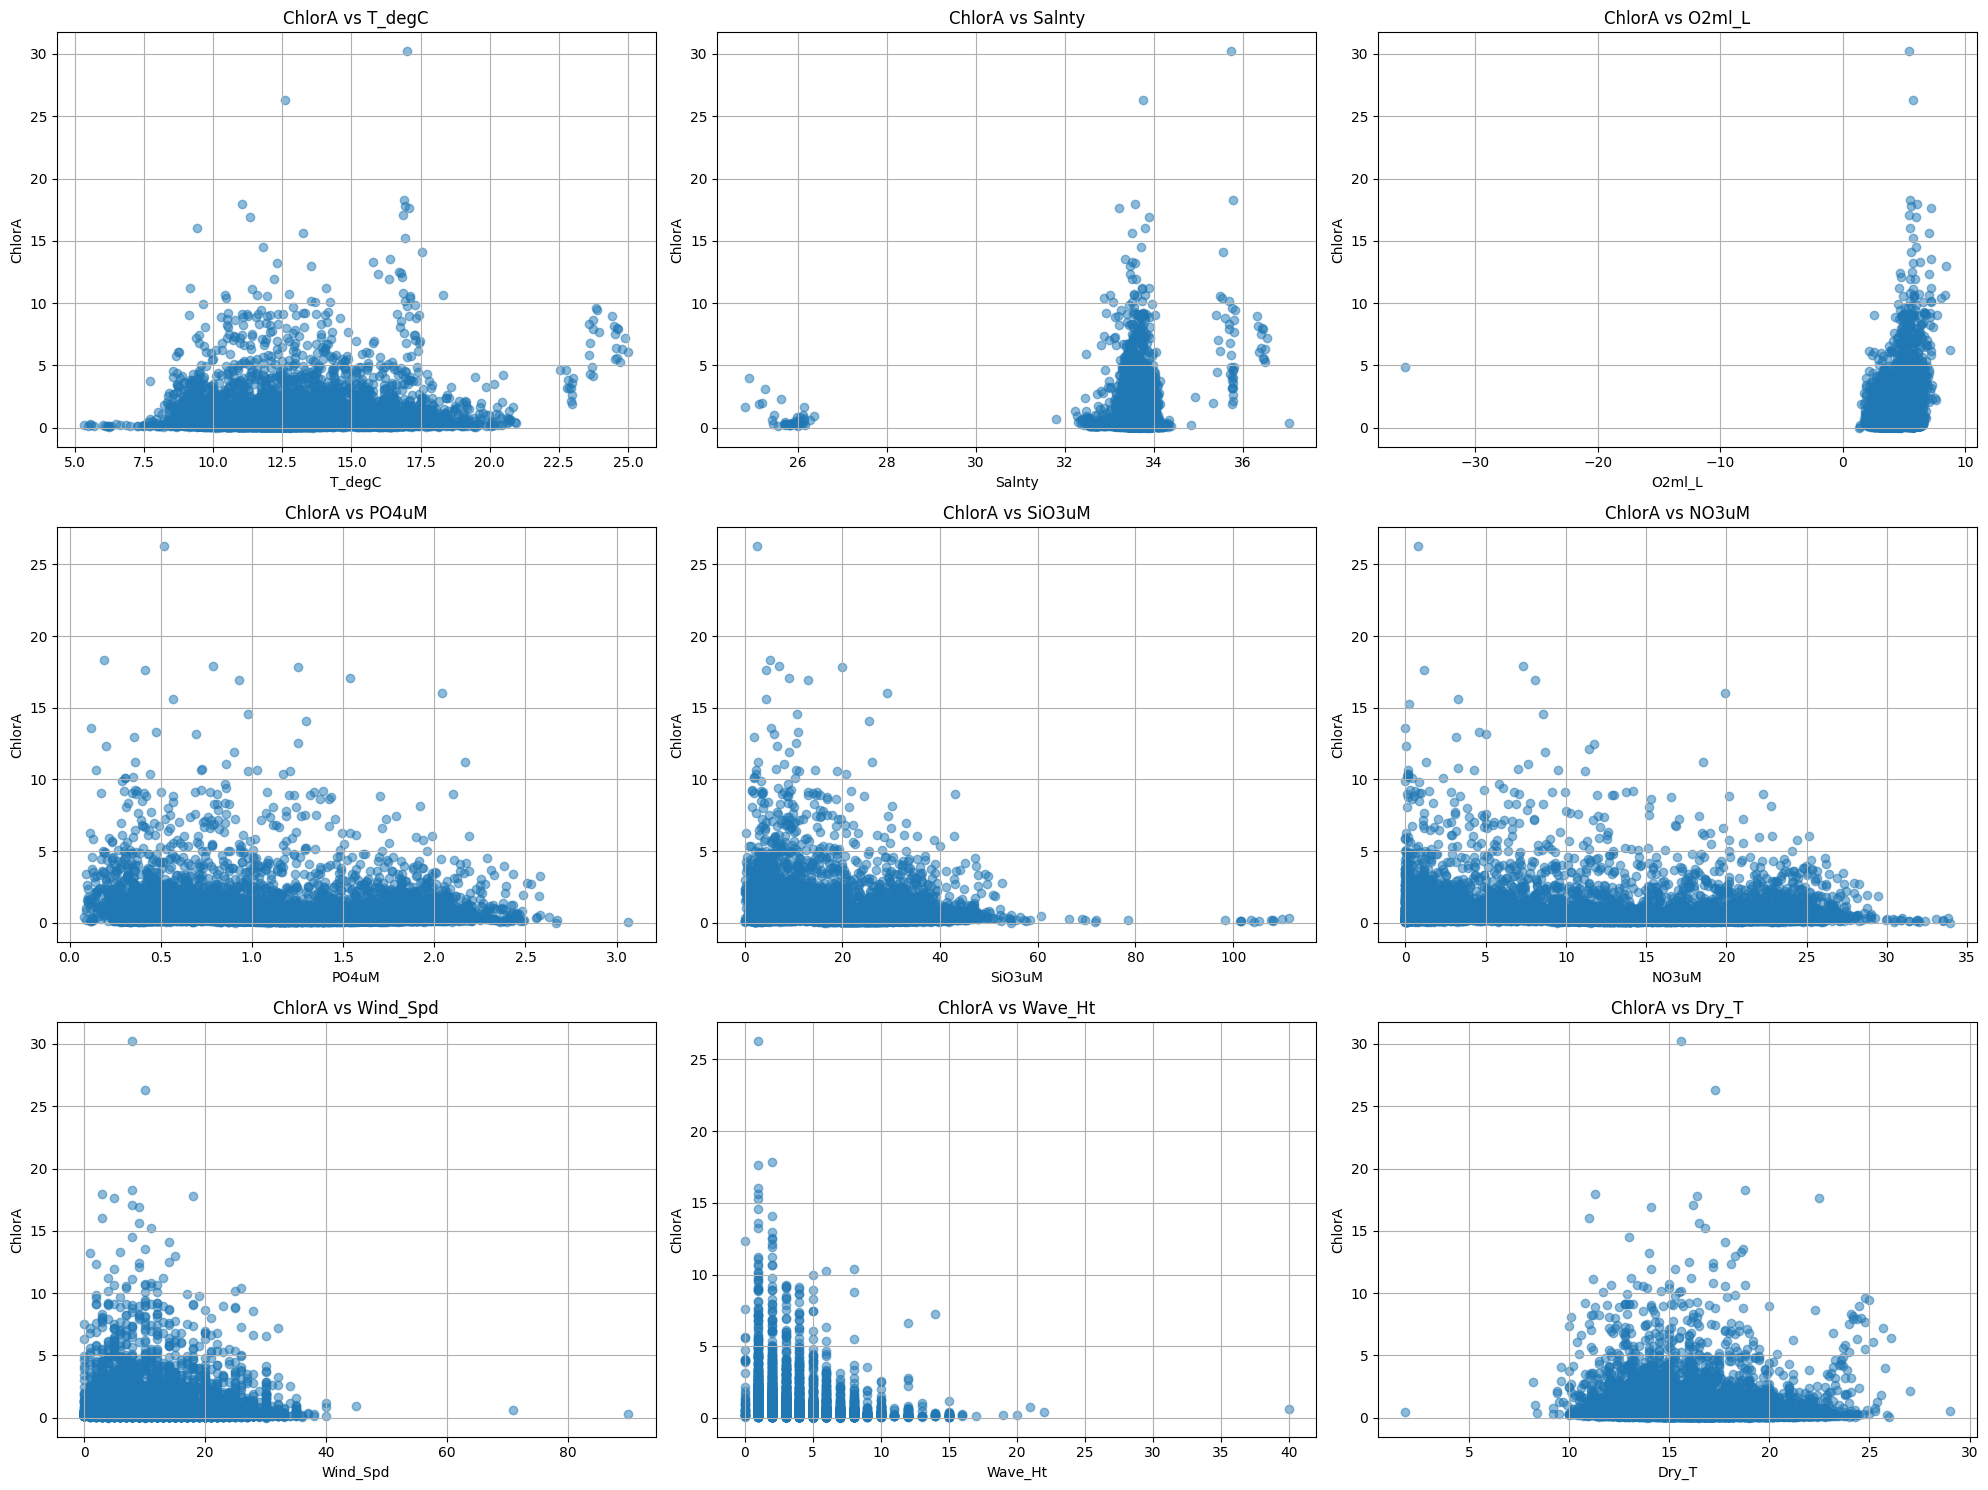

In [28]:
# List of covariates to compare with 'ChlorA'
covariates = ['T_degC', 'Salnty', 'O2ml_L', 'PO4uM', 'SiO3uM', 'NO3uM', 'Wind_Spd', 'Wave_Ht', 'Dry_T']

# Set up the figure
plt.figure(figsize=(20, 15))

# Loop through the covariates and create scatter plots
for i, var in enumerate(covariates, 1):
    if var in combined_data.columns:
        plt.subplot(3, 3, i)
        plt.scatter(combined_data[var], combined_data['ChlorA'], alpha=0.5)
        plt.title(f'ChlorA vs {var}')
        plt.xlabel(var)
        plt.ylabel('ChlorA')
        plt.grid(True)

plt.tight_layout()
plt.show()

- There doesn't appear to be a clear relationship between any variable and the response

In [29]:
combined_data.to_csv('Datasets/combined_data.csv', index=False)

print("DataFrame has been saved successfully to Datasets/")

DataFrame has been saved successfully to Datasets/


## Handling Missing Values and Clustering

In [15]:
# removes the NAs for ChlorA
data_clean = combined_data.dropna(subset=['ChlorA'])
data_clean.head()

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer,YearMonth
18831,18832,133.0 035.0,0.650000,0.425000,13.172667,34.336533,2.785000,NaN,NaN,14.103333,...,67,25.850000,-113.500000,26731.0,12.0,3.0,19.0,6.0,1001.6,1973-03
18832,18833,142.7 008.0,2.483333,1.103333,16.316316,34.930211,2.298421,NaN,27.489474,NaN,...,69,25.026666,-110.750000,26733.0,7.0,NaN,19.2,NaN,1001.7,1973-03
18833,18834,142.0 008.0,0.240000,3.330000,14.762400,34.833250,2.067200,NaN,NaN,NaN,...,69,25.093333,-110.783333,26733.0,4.0,1.0,20.6,3.0,1001.7,1973-03
18834,18835,120.0 010.0,2.425000,2.483000,15.270000,NaN,3.535000,1.812,31.675000,NaN,...,70,28.856666,-113.258333,26734.0,15.0,1.0,18.8,1.0,1001.0,1973-03
18835,18836,120.0 009.0,5.540909,2.557273,14.281923,NaN,2.874615,NaN,NaN,NaN,...,71,28.878333,-113.191666,26735.0,10.0,1.0,18.9,2.0,1000.8,1973-03


In [16]:
# check the data types
# removes the NAs for ChlorA
data_clean = pd.DataFrame(data_clean)
print(data_clean.dtypes)

Cst_Cnt                 int64
Sta_ID                 object
ChlorA                float64
Phaeop                float64
T_degC                float64
Salnty                float64
O2ml_L                float64
PO4uM                 float64
SiO3uM                float64
NO3uM                 float64
Depthm                float64
Date           datetime64[ns]
Year                    int64
Month                   int64
Julian_Day              int64
Lat_Dec               float64
Lon_Dec               float64
Julian_Date           float64
Wind_Spd              float64
Wave_Ht               float64
Dry_T                 float64
Wave_Prd              float64
Barometer             float64
YearMonth           period[M]
dtype: object


In [17]:
data_clean['Date'] = pd.to_datetime(data_clean['Date'], format='%m/%d/%Y')
print(data_clean.dtypes)

Cst_Cnt                 int64
Sta_ID                 object
ChlorA                float64
Phaeop                float64
T_degC                float64
Salnty                float64
O2ml_L                float64
PO4uM                 float64
SiO3uM                float64
NO3uM                 float64
Depthm                float64
Date           datetime64[ns]
Year                    int64
Month                   int64
Julian_Day              int64
Lat_Dec               float64
Lon_Dec               float64
Julian_Date           float64
Wind_Spd              float64
Wave_Ht               float64
Dry_T                 float64
Wave_Prd              float64
Barometer             float64
YearMonth           period[M]
dtype: object
